In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
Sequential = tf.keras.Sequential # 모델
Dense = tf.keras.layers.Dense # 뉴런
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rc('font', family='gulim') # NanumGothic  gulim NanumSquareRoundR

In [8]:


# 텐서플로우에서의 예제 데이터셋 생성
dataset = tf.data.Dataset.from_tensor_slices([[1,1], [2,2], [3,3], [4,4], [5,5]])
for i in dataset:
    print(i)
print(len(dataset))
# 배치 크기 2로 데이터를 처리
dataset = dataset.batch(2)

# 데이터셋 순회
for batch in dataset:
    print(batch)


tf.Tensor([1 1], shape=(2,), dtype=int32)
tf.Tensor([2 2], shape=(2,), dtype=int32)
tf.Tensor([3 3], shape=(2,), dtype=int32)
tf.Tensor([4 4], shape=(2,), dtype=int32)
tf.Tensor([5 5], shape=(2,), dtype=int32)
5
tf.Tensor(
[[1 1]
 [2 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3 3]
 [4 4]], shape=(2, 2), dtype=int32)
tf.Tensor([[5 5]], shape=(1, 2), dtype=int32)


In [10]:
df = sns.load_dataset('iris')
type_model = 'category'
category_name = 'species'
epoch_arr = list(range(1,3001))
type_model = 'category'  # 모델 분류
input_num = 4
output_num = 3


In [36]:
# from sklearn.model_selection import GroupShuffleSplit

# # 그룹을 기준으로 분할
# gss = GroupShuffleSplit(test_size=0.2, n_splits=3, random_state=42)
# train_idx, test_idx = next(gss.split(df, groups=df['species']))
# print(train_idx, test_idx)
# train_df = df.iloc[train_idx]
# test_df = df.iloc[test_idx]
# 구리네


[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [40]:
# df['species'].unique()  #['setosa', 'versicolor', 'virginica'] 1,2,3
# df[df['species'] == 'setosa'].rep
# df['species'] = df['species'].replace(['setosa', 'versicolor', 'virginica'], [1,2,3])
# df['species'].unique()


# df = pd.get_dummies(df['species'])
# df = pd.get_dummies(df, columns=['species'], dtype=int)
# df


,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
# TODO 제네릭하게 수정중
x_train = []
y_train = []
x_test, y_test = [],[]
if type_model == 'category' :
    
    unique_values = df[category_name].unique()
    df[category_name] = df[category_name].replace(df[category_name].unique(), list(range(1, len(df[category_name].unique())+1 )))
    x_train = df.iloc[:, 0:4]
    # y_train = df['species']
    y_train = df.iloc[:, 4:]
    train_arr = []
    test_arr = []
    for i in unique_values:
        train_class_0, test_class_0 = train_test_split(df[df[category_name] == i], test_size=0.2, random_state=42)
        train_arr.append(train_class_0)
        test_arr.append(test_class_0)


    # 다시 합쳐서 최종 train과 test 데이터셋을 구성
    x_train = pd.concat(train_arr)
    y_train = pd.concat(test_arr)
    x_train, x_test = pd.get_dummies(x_train, columns=[category_name], dtype=int)
    y_train, y_test = pd.get_dummies(y_train, columns=[category_name], dtype=int)
else :
    x_train = df.iloc[:, 0:4]
    # y_train = df['species']
    y_train = df.iloc[:, 4:]
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [11]:
unique_values = df[category_name].unique()
df[category_name] = df[category_name].replace(df[category_name].unique(), list(range(1, len(df[category_name].unique())+1 )))
df = pd.get_dummies(df, columns=[category_name], dtype=int)
x_train = df.iloc[:, 0:4]
# y_train = df['species']
y_train = df.iloc[:, 4:]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# df[category_name]
# x_train
y_train

,species_1,species_2,species_3
22,1,0,0
15,1,0,0
65,0,1,0
11,1,0,0
42,1,0,0
...,...,...,...
71,0,1,0
106,0,0,1
14,1,0,0
92,0,1,0


4/4 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9750
Loss: 0.052976660430431366, Accuracy: 0.9750000238418579
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 40        
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 8)                 40        
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dense_22 (Dense)            (None, 8)                 40        
                                                                 
 dense_23 (Dense)            (None, 4)      

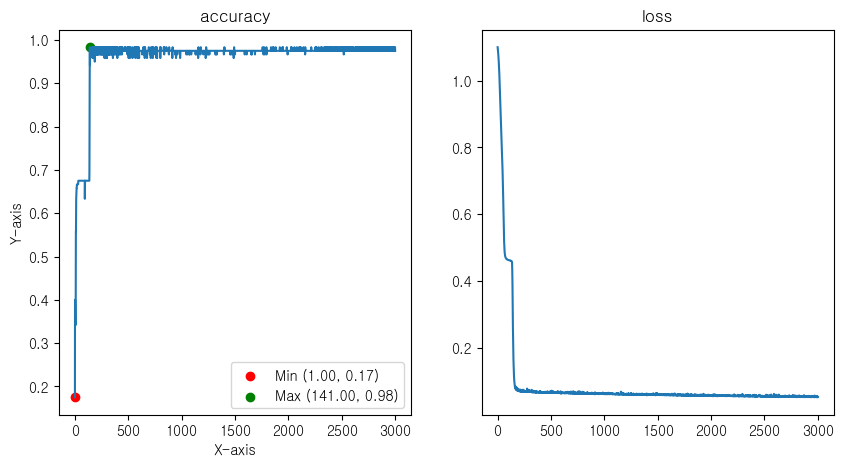

In [12]:
# 명 서 등 비
# 겟더미 
# 원핫인코딩

model = Sequential()
model.add(Dense(input_num * 2, input_shape=(input_num,), activation='relu'))
model.add(Dense(input_num, activation='relu')) # 은닉층의 수가 줄어드니까 더 잘나오나?
model.add(Dense(input_num * 2, activation='relu'))
model.add(Dense(input_num, activation='relu'))
model.add(Dense(input_num * 2, activation='relu'))
model.add(Dense(input_num, activation='relu'))
model.add(Dense(input_num * 2, activation='relu'))
model.add(Dense(input_num, activation='relu'))
# model.add(Dense(4, activation='relu'))
if type_model == 'category':
    model.add(Dense(output_num, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
else :
    model.add(Dense(output_num, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


accuracy_arr = []
loss_arr = []
for epoch in epoch_arr:
    history = model.fit(x_train, y_train, epochs=1, verbose=1, validation_data=(x_train, y_train))
    # 가중치와 편향 출력
    weights, biases = model.layers[0].get_weights()
    clear_output(wait=True) # clear_screen()
    print("에포크 (epoch):\n", epoch)
    print("편향 (Biases):\n", biases)
    print("가중치 (Weights):\n", weights)
    
    accuracy = history.history['accuracy'][0]
    accuracy_arr.append(accuracy)
    loss_arr.append(history.history['loss'])
    print("정확도 (Biases):\n", accuracy)
    if accuracy == 1.0 and epoch_arr > 10 :
        print(f"정확도가 100%에 도달한 에포크: {epoch + 1}")
        break
clear_output(wait=True)
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')
model.summary()


# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열의 서브플롯


# 최소값과 최대값 표시
min_y, max_y = min(accuracy_arr), max(accuracy_arr)
min_x = epoch_arr[np.argmin(accuracy_arr)]
max_x = epoch_arr[np.argmax(accuracy_arr)]

# 최소값과 최대값을 그래프에 표시
ax1.scatter(min_x, min_y, color='red', label=f'Min ({min_x:.2f}, {min_y:.2f})')
ax1.scatter(max_x, max_y, color='green', label=f'Max ({max_x:.2f}, {max_y:.2f})')

# 레이블 및 범례 추가
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.legend()

# 첫 번째 서브플롯 (왼쪽)
ax1.plot(epoch_arr, accuracy_arr)
ax1.set_title("accuracy")

# 두 번째 서브플롯 (오른쪽)
ax2.plot(epoch_arr, loss_arr)
ax2.set_title("loss")
plt.show()

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 [==============================] - 0s 18ms/step - loss: 0.0389 - accuracy: 1.0000
Loss: 0.038880206644535065, Accuracy: 1.0


In [14]:
df = sns.load_dataset('iris')
df.head()
df.info()
# df['species'].unique()  #['setosa', 'versicolor', 'virginica'] 1,2,3
df.describe()
df.head() # sepal_length	sepal_width	petal_length	petal_width	species
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64